In [4]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from itertools import combinations,permutations
G = nx.DiGraph([(1, 2), (2, 3)])
triadic = nx.triadic_census(G)
tc_key = list(triadic.keys())


data_path = r"C:\Users\hexie\OneDrive\Desktop\Projects\ecology\cancer\data\\"

organs = ["breast", "colon", "head", "kidneyc", "kidneyp", "liver", "lunga", "lungs", "prostate", "stomach", "thyroid","uterine"]



def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)


G_list = []

for y in organs:
    
    G = nx.Graph()
    temp = np.loadtxt(data_path + y+".txt", dtype="int")
    G.add_edges_from(temp)

    G_list.append(G)


jaccard_matrix = np.zeros((12,12))

In [6]:
comb = combinations(list(range(12)), 2)
for c in comb:
    #print(c[0],c[1])
    jaccard_matrix[c[0], c[1]] = jaccard_similarity(G_list[c[0]].edges, G_list[c[1]].edges)
    
    jaccard_matrix[c[1], c[0]] = jaccard_similarity(G_list[c[0]].edges, G_list[c[1]].edges)
    
for i in range(12):
    jaccard_matrix[i,i] = jaccard_similarity(G_list[i].edges, G_list[i].edges)

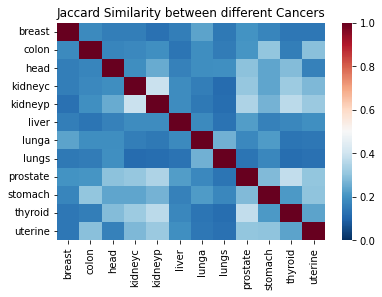

In [9]:
ax = sns.heatmap(jaccard_matrix, robust=True, xticklabels=organs, yticklabels=organs, fmt="f", cmap='RdBu_r', vmin=0, vmax=1)
plt.title("Jaccard Similarity between different Cancers")
plt.savefig('fig1-jaccard.pdf', bbox_inches='tight')